# **<span style="font-size:larger;"> Part 2: <span style="color:blue">Feature Engineering & Modeling</span>** #

# I. Preparing Data

**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

**Defining Functions**

In [4]:
def regression_metrics(X, y):
    import sklearn.metrics as metrics
    linreg = LinearRegression()
    fit = linreg.fit(X, y)
    y_hat = linreg.predict(X)

    r_squared = linreg.score(X, y)
    mean_squared_err = metrics.mean_squared_error(y, y_hat)
    root_mean_squared_err = np.sqrt(mean_squared_err)
    mean_abs_err = metrics.mean_absolute_error(y, y_hat)
    median_abs_err = metrics.median_absolute_error(y, y_hat)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    
    print("R-squared: {}".format(r_squared))
    print("Adjusted R-squared: {}".format(adj_r_squared))
    print("Mean Squared Error: {}".format(mean_squared_err))
    print("Root Mean Squared Error: {}".format(root_mean_squared_err))
    print("Mean Absolute Error: {}".format(mean_abs_err))
    print("Median Absolute Error: {}".format(median_abs_err))

**Importing Data**

In [5]:
df = pd.read_csv("../datasets/train_final.csv")
df_test = pd.read_csv("../datasets/test_final.csv")

# II. Train Test Split

In [6]:
features = (df.drop(columns = ['SalePrice']).columns)
X = df[features]
y = df['SalePrice']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# III. Scaling Data

In [8]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()

Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)
df_test_sc = scaler.transform(df_test)

# IV. Modeling

## 1. Baseline Model

In [9]:
# Using a dummy regressor to determine baseline

from sklearn.dummy import DummyRegressor

dum_reg = DummyRegressor(strategy="median")
dum_reg.fit(X_train, y_train)
print(dum_reg.score(X_train, y_train))
print(dum_reg.score(X_test, y_test))

-0.052799545344822674
-0.028955636225481918


In [10]:
print(" Baseline ".center(18, "="))
print(dum_reg.score(X_train, y_train))
print(dum_reg.score(X_test, y_test))
print()

==== Baseline ====
-0.052799545344822674
-0.028955636225481918



## 2. OLS Model

In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [12]:
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

0.9364654162780442
0.9161838724975359


In [13]:
print(" Baseline ".center(18, "="))
print(dum_reg.score(X_train, y_train))
print(dum_reg.score(X_test, y_test))
print()
print(" OLS ".center(18, "="))
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))
print()

==== Baseline ====
-0.052799545344822674
-0.028955636225481918

====== OLS =======
0.9364654162780442
0.9161838724975359



In [14]:
# Creating csv with predictions

predictions = linreg.predict(df_test)
df_test['SalePrice'] = predictions
submissions = df_test[['Id', 'SalePrice']]
submissions.to_csv('../datasets/predictions/ols_predictions.csv', index=False)
df_test.drop(columns = ['SalePrice'], inplace=True)

## 3. Ridge Model

**Unscaled**

In [15]:
from sklearn.linear_model import RidgeCV, Ridge

In [16]:
ridge_model = Ridge(alpha=5.7769512)
ridge_model.fit(X_train, y_train)

print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.9320143077908145
0.9218224123735306


**Scaled**

In [17]:
ridge_model = Ridge(alpha=137)
ridge_model.fit(Z_train, y_train)

print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.9340629404674673
0.919937399975405


The unscaled data surprisingly preformed better.

In [18]:
ridge_model = Ridge(alpha=5.7769512)
ridge_model.fit(X_train, y_train)

print(" Baseline ".center(18, "="))
print(dum_reg.score(X_train, y_train))
print(dum_reg.score(X_test, y_test))
print()
print(" OLS ".center(18, "="))
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

==== Baseline ====
-0.052799545344822674
-0.028955636225481918

====== OLS =======
0.9364654162780442
0.9161838724975359

===== Ridge ======
0.9320143077908145
0.9218224123735306


In [19]:
# Creating csv with predictions

ridge_model = Ridge(alpha=5.81)
ridge_model.fit(X_train, y_train)

predictions = ridge_model.predict(df_test)
df_test['SalePrice'] = predictions
submissions = df_test[['Id', 'SalePrice']]
submissions.to_csv('../datasets/predictions/ridge_predictions.csv', index=False)
df_test.drop(columns = ['SalePrice'], inplace=True)

## 4. LASSO Model

In [20]:
from sklearn.linear_model import Lasso

**Unscaled**

In [21]:
lasso = Lasso(alpha=23.9)
# Fit model using best ridge alpha!
lasso.fit(X_train, y_train);

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9334598107896478
0.9206734022010482


**Scaled**

In [22]:
lasso = Lasso(alpha=196.9)
# Fit model using best ridge alpha!
lasso.fit(Z_train, y_train);

print(lasso.score(Z_train, y_train))
print(lasso.score(Z_test, y_test))

0.9340485517065752
0.9193867455269369


The unscaled data surprisingly preformed better.

In [23]:
lasso = Lasso(alpha=23.9)
lasso.fit(X_train, y_train);

print(" Baseline ".center(18, "="))
print(dum_reg.score(X_train, y_train))
print(dum_reg.score(X_test, y_test))
print()
print(" OLS ".center(18, "="))
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))
print()
print(" Lasso  ".center(18, "="))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

==== Baseline ====
-0.052799545344822674
-0.028955636225481918

====== OLS =======
0.9364654162780442
0.9161838724975359

===== Ridge ======
0.9319983643861597
0.9218223814338667

===== Lasso  =====
0.9334598107896478
0.9206734022010482


In [24]:
# Creating csv with predictions

lasso = Lasso(alpha=23.9)
lasso.fit(X_train, y_train);

predictions = lasso.predict(df_test)
df_test['SalePrice'] = predictions
submissions = df_test[['Id', 'SalePrice']]
submissions.to_csv('../datasets/predictions/lasso_predictions.csv', index=False)
df_test.drop(columns = ['SalePrice'], inplace=True)

## 5. ElasticNet Model

In [25]:
from sklearn.linear_model import ElasticNet

**Unscaled**

In [26]:
enet_model = ElasticNet(alpha=0.007541)
enet_model = enet_model.fit(X_train, y_train)

print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.932014227241397
0.921822360169946


**Scaled**

In [27]:
enet_model = ElasticNet(alpha=0.179)
enet_model = enet_model.fit(Z_train, y_train)

print(enet_model.score(Z_train, y_train))
print(enet_model.score(Z_test, y_test))

0.9340601583571245
0.9199381384610146


The unscaled data surprisingly preformed better.

In [28]:
enet_model = ElasticNet(alpha=0.007541)
enet_model = enet_model.fit(X_train, y_train)

print(" Baseline ".center(18, "="))
print(dum_reg.score(X_train, y_train))
print(dum_reg.score(X_test, y_test))
print()
print(" OLS ".center(18, "="))
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))
print()
print(" Lasso  ".center(18, "="))
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print()
print(" ElasticNet ".center(18, "="))
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

==== Baseline ====
-0.052799545344822674
-0.028955636225481918

====== OLS =======
0.9364654162780442
0.9161838724975359

===== Ridge ======
0.9319983643861597
0.9218223814338667

===== Lasso  =====
0.9334598107896478
0.9206734022010482

=== ElasticNet ===
0.932014227241397
0.921822360169946


In [29]:
# Creating csv with predictions

predictions = enet_model.predict(df_test)
df_test['SalePrice'] = predictions
submissions = df_test[['Id', 'SalePrice']]
submissions.to_csv('../datasets/predictions/enet_predictions.csv', index=False)
df_test.drop(columns = ['SalePrice'], inplace=True)

# V. Working with our Best Model

## Model Evaluation

In [30]:
ridge_model = Ridge(alpha=5.7769512)
ridge_model.fit(X_train, y_train)

print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.9320143077908145
0.9218224123735306


In [31]:
predictions = ridge_model.predict(X_test)

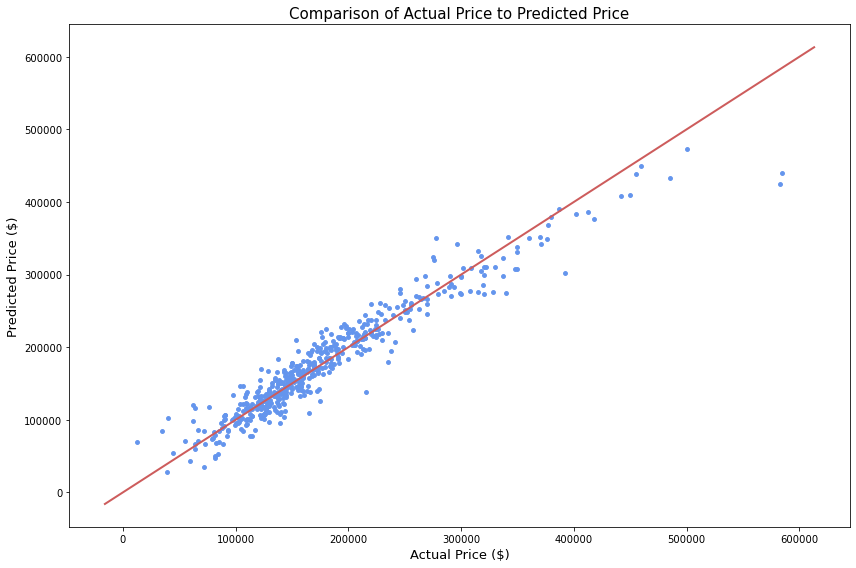

In [32]:
plt.figure(figsize = (12, 8))
plt.scatter(x = y_test, y = predictions, color = 'cornflowerblue', s = 15 )
plt.title('Comparison of Actual Price to Predicted Price', fontdict = {'fontsize':15})
xpoints = ypoints = plt.xlim() # code borrowed from kilodalton's response on Stack Overflow
plt.plot(xpoints, ypoints, linestyle='-', color='indianred', lw=2)
plt.xlabel('Actual Price ($)', fontdict= {'fontsize':13})
plt.ylabel('Predicted Price ($)', fontdict= {'fontsize':13})
plt.tight_layout();

plt.savefig('actual_vs_predicted.png', dpi=300)

## Taking a Look at Our Coefficients

In [33]:
# Creating a dictionary of coefficients

coef = (dict(list(zip(X_train.columns, ridge_model.coef_))))

In [34]:
# Organizing dictionary. Code found from Devin Jeanpierre's response on Stack Overflow

{k: v for k, v in sorted(coef.items(), key=lambda item: item[1])}

{'Functional_Maj1': -15843.100662911544,
 'Roof Style_Mansard': -12648.948688437698,
 'Neighborhood_NWAmes': -11695.487688819396,
 'Condition 1_RRNn': -11146.859974367746,
 'Sale Type_COD': -11019.791637298027,
 'Neighborhood_SawyerW': -10399.748779819796,
 'Neighborhood_Gilbert': -10096.6311783244,
 'Neighborhood_Veenker': -9284.642921517732,
 'Garage Type_2Types': -9064.283440306499,
 'Kitchen AbvGr': -8587.998130712467,
 'Land Contour_Low': -8584.397990691092,
 'Condition 1_RRAe': -8309.43605099284,
 'Neighborhood_Edwards': -8249.09550214736,
 'Neighborhood_NAmes': -8084.658652830305,
 'Exterior 1st_BrkComm': -8033.8070881535505,
 'Functional_Sev': -7865.032595495678,
 'MS SubClass_120': -7715.005050649352,
 'Roof Matl_Tar&Grv': -7451.408346190037,
 'Bsmt Exposure_Mn': -7134.871605222715,
 'Neighborhood_Timber': -7016.83240226975,
 'Neighborhood_ClearCr': -6865.038947540283,
 'Bsmt Exposure_No': -6359.813432960162,
 'Bedroom AbvGr': -6277.240371732967,
 'Sale Type_WD ': -6189.396472

# VI. Conclusions

The ridge regression model had the best predictive performance on housing sale price in Ames, Iowa, and outperformed the other linear models tested. The model revealed that Overall, Exterior, and Kitchen Quality have a high correlation with the sale price of a home. Also, categorical features that had a high correlation with sale price were poured concrete foundation, having a finished garage, and having vinyl siding for exterior covering. Features that decrease the sale price of a home include an unfinished garage, a home located within 200' of East-West Railroad, roof material of gravel and tar, and a low depression land contour.

Using this final model, I am able to account for approximately 92.2% of the variation in Sale Price. With a 71% improvement from the base model, my model proves to be an efficient method of determining sale prices of homes in Ames, Iowa. With more time, an adjustment to the model would be made to increase the accuracy of predicting the sale prices in more expensive homes.